In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

In [2]:
num_distances = 100
distances = np.random.uniform(0, 30, size=num_distances)

# ranking index proportional to distance (scaled to [0, 1000])
def calculate_ranking_index(distances):
    # scale distances to [0, 1000]
    return np.clip((distances / 100) * 1000, 0, 1000).astype(int)
# apply the function to each row's distance list
ranking_index = [calculate_ranking_index(d) for d in distances]

# ranking score proportional to ranking index (scaled to [0, 100])
def calculate_inverse_ranking_score(index):
    # inverse proportionality: higher index -> lower score
    epsilon = 1e-5
    score = 1000 / (index + epsilon) 
    # hormalize to 0 to 100 scale
    normalized_score = np.clip(score, 0, 100)
    return normalized_score
ranking_score = np.array([calculate_inverse_ranking_score(index) for index in ranking_index])

# recall score [0, 1]
recall_score_1 = np.random.uniform(0, 1, size=num_distances)

recall_score_2_desired_mean = 0.8
recall_score_2_desired_std = 2
recall_score_2_range_width = recall_score_2_desired_mean * np.sqrt(12)
recall_score_2_low = recall_score_2_desired_mean - recall_score_2_range_width / 2
recall_score_2_high = recall_score_2_desired_mean + recall_score_2_range_width / 2
recall_score_2 = np.random.uniform(recall_score_2_low, recall_score_2_high, size=num_distances)

recall_score_3_desired_mean = 1
recall_score_3_desired_std = 2
recall_score_3_range_width = recall_score_3_desired_mean * np.sqrt(12)
recall_score_3_low = recall_score_3_desired_mean - recall_score_3_range_width / 2
recall_score_3_high = recall_score_3_desired_mean + recall_score_3_range_width / 2
recall_score_3 = np.random.uniform(recall_score_3_low, recall_score_3_high, size=num_distances)

df =  pd.DataFrame({
    "Distance": distances,
    "Ranking Index": ranking_index,
    "Ranking Score": ranking_score,
    "Recall Score 1": recall_score_1,
    "Recall Score 2": recall_score_2,
    "Recall Score 3": recall_score_3,
})
df

,Distance,Ranking Index,Ranking Score,Recall Score 1,Recall Score 2,Recall Score 3
0,22.770459,227,4.405286,0.684334,0.768755,1.808184
1,5.387048,53,18.867921,0.645785,0.673169,-0.679519
2,10.696657,106,9.433961,0.238215,1.460901,-0.205562
3,1.704428,17,58.823495,0.304526,-0.575850,1.013997
4,24.956983,249,4.016064,0.183690,-0.572752,1.108261
...,...,...,...,...,...,...
95,24.237588,242,4.132231,0.583959,2.002623,-0.662779
96,0.890367,8,100.000000,0.313255,1.461169,0.136134
97,28.419254,284,3.521127,0.454065,1.721635,-0.652709
98,5.963507,59,16.949150,0.338591,1.703618,-0.239460


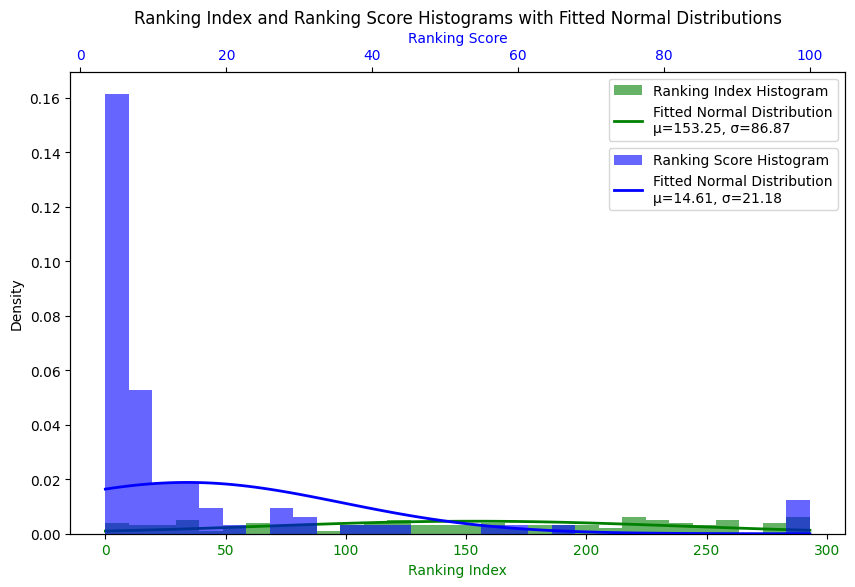

In [ ]:
# ranking index
ranking_index_mean, ranking_index_std = stats.norm.fit(df['Ranking Index'])
x1 = np.linspace(min(df['Ranking Index']), max(df['Ranking Index']), 100)
p1 = stats.norm.pdf(x1, ranking_index_mean, ranking_index_std)

# ranking score
ranking_score_mean, ranking_score_std = stats.norm.fit(df['Ranking Score'])
x2 = np.linspace(min(df['Ranking Score']), max(df['Ranking Score']), 100)
p2 = stats.norm.pdf(x2, ranking_score_mean, ranking_score_std)

# plot ranking index, scores's histograms and fitted normal distributions
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot for ranking index
ax1.hist(df['Ranking Index'], bins=30, alpha=0.6, density=True, color='g', label='Ranking Index Histogram')
ax1.plot(x1, p1, 'g', linewidth=2, label=f'Fitted Normal Distribution\nμ={ranking_index_mean:.2f}, σ={ranking_index_std:.2f}')
ax1.set_xlabel(f'Ranking Index', color='g')
ax1.set_ylabel('Density')
ax1.tick_params(axis='x', labelcolor='g')
ax1.tick_params(axis='y')

# plot for ranking score
ax2 = ax1.twiny()
ax2.hist(df['Ranking Score'], bins=30, alpha=0.6, density=True, color='b', label='Ranking Score Histogram')
ax2.plot(x2, p2, 'b', linewidth=2, label=f'Fitted Normal Distribution\nμ={ranking_score_mean:.2f}, σ={ranking_score_std:.2f}')
ax2.set_xlabel(f'Ranking Score', color='b')
ax2.tick_params(axis='x', labelcolor='b')

ax1.legend(loc='upper right')
ax2.legend(loc="upper right", bbox_to_anchor=(1.0, 0.85))

# show plot
plt.title('Ranking Index and Ranking Score Histograms with Fitted Normal Distributions')
plt.show()

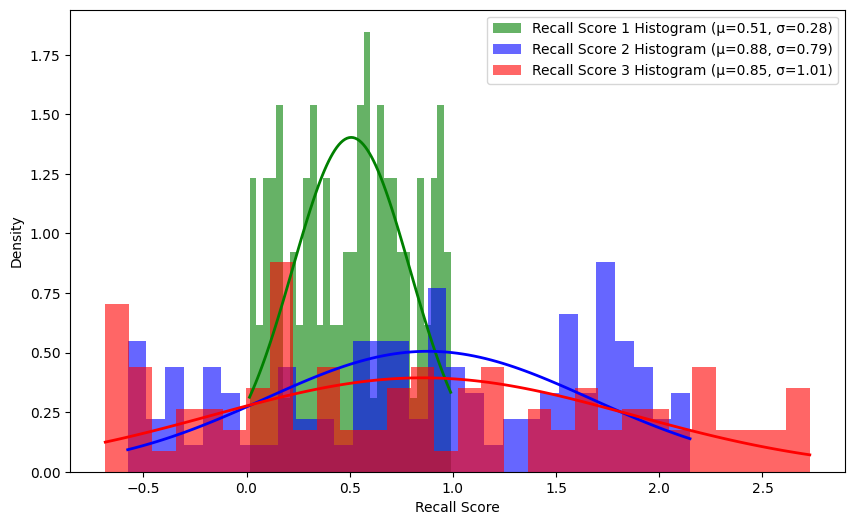

In [4]:
# plot recall the histograms and fitted normal distributions
plt.figure(figsize=(10, 6))

# plot for recall score 1
recall_score_1_mean, recall_score_1_std = stats.norm.fit(df['Recall Score 1'])
x1 = np.linspace(min(df['Recall Score 1']), max(df['Recall Score 1']), 100)
p1 = stats.norm.pdf(x1, recall_score_1_mean, recall_score_1_std)

plt.hist(df['Recall Score 1'], bins=30, density=True, alpha=0.6, color='g', label=f'Recall Score 1 Histogram (μ={recall_score_1_mean:.2f}, σ={recall_score_1_std:.2f})')
plt.plot(x1, p1, 'g', linewidth=2)

# plot for recall score 2
recall_score_2_mean, recall_score_2_std = stats.norm.fit(df['Recall Score 2'])
x2 = np.linspace(min(df['Recall Score 2']), max(df['Recall Score 2']), 100)
p2 = stats.norm.pdf(x2, recall_score_2_mean, recall_score_2_std)

plt.hist(df['Recall Score 2'], bins=30, density=True, alpha=0.6, color='b', label=f'Recall Score 2 Histogram (μ={recall_score_2_mean:.2f}, σ={recall_score_2_std:.2f})')
plt.plot(x2, p2, 'b', linewidth=2)

# plot for recall score 3
recall_score_3_mean, recall_score_3_std = stats.norm.fit(df['Recall Score 3'])
x3 = np.linspace(min(df['Recall Score 3']), max(df['Recall Score 3']), 100)
p3 = stats.norm.pdf(x3, recall_score_3_mean, recall_score_3_std)

plt.hist(df['Recall Score 3'], bins=30, density=True, alpha=0.6, color='r', label=f'Recall Score 3 Histogram (μ={recall_score_3_mean:.2f}, σ={recall_score_3_std:.2f})')
plt.plot(x3, p3, 'r', linewidth=2)

# add labels and legend
plt.xlabel('Recall Score')
plt.ylabel('Density')
plt.legend()

# show plot
plt.show()